<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/AprendizajeProfundo/Diplomado/blob/master/Temas/M%C3%B3dulo%2014-%20Aprendizaje%20no%20Supervisado/Cuadernos/ACP.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

# **<p align="center"><font size=5 color=#006600>Diplomado en Inteligencia Artificial y Aprendizaje Profundo**

# **<p align="center"><font size=5 color=#FF0033>Análisis en componentes principales**

# **<font size=5 color=#0000FF>Profesores**

1. Campo Elías Pardo Turriago, cepardot@unal.edu.co 
2. Alvaro Mauricio Montenegro Díaz,ammontenegrod@unal.edu.co 
3. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com






# **<font size=5 color=#0000FF>Asesora Medios y Marketing Digital**

1. Maria del Pilar Montenegro, pmontenegro88@gmail.com

# **<font size=5 color=#0000FF>Asistentes**

1. Oleg Jarma, ojarmam@unal.edu.co
2. Laura Lizarazo, ljlizarazore@unal.edu.co



## **Contenido**

* [Introducción](#)
* [Nube de individuos](#)
* [Nube de variables](#)
* [Dualidad entre representaciones](#)
* [ACP generalizado](#)


## **Introducción**

El análisis en componentes principales (ACP) es muy conocido en la Ciencia de Datos como una técnica de reducción de dimensión, pero es mucho más que eso. Si se aborda desde un punto de vista geométrico, es una técnica poderosa para la visualización de datos. Su generalización ha permitido el desarrollo de otros métodos sobre todo para la descripción de variables cualitativas, en cuyo caso también sirve como método de cuantificación de lo cualitativo. Esa visión geométrica de origen francés es la que presentamos aquí. Hacemos uso del R en primera instancia para entender los métodos y luego para llevarlos a la práctica. En este cuaderno introducimos el ACP como se conoce en la mayoría de los ámbitos y que podemos llamar ACP canónico, y al final presentamos el ACP general o generalizado, como un marco común a los métodos derivados, que podemos llamar métodos factoriales o en ejes principales, de los que forman parte los análisis de correspondencias simples y múltiples.

### Objetivos del ACP

1. Comparar los individuos entre si
2. Describir las relaciones entre las variables
3. Reducir la dimensión de la representación



### Ejemplo Café y notación

Para entender el ACP  utilizamos un ejemplo muy pequeño, dispoble en *FactoClass*, y que denominamos Café. Es el resultado de un experimento realizado en el Laboratorio de Investigaciones Químicas del Café.

El experimento considera 3 factores:

- Agregado (sin maíz, cebada)
- Porcentaje del agregado (20\% y 40\%)
- Grado de tostación (clara y oscura)

Se producen  "libras de café" tostado y molido para los 10 tratamientos del experimento y con ellas se preparan tazas de café que se someten a mediciones físicas químicas y de degustación. El ejemplo de esta sección utiliza solo las tres variables físicas, para visualizar la geometría del ACP. La tabla de datos de 10 filas y 3 columnas la definimos como **Y**.




In [ ]:
# carga de FactoClass y definición de Y
library(FactoClass)


In [ ]:
# definición de Y
data(cafe)
Y<-cafe[1:10,1:3]
Y

,Color,DA,EA
,<int>,<dbl>,<int>
ExCl,298,385.1,25
C40M,361,481.3,41
C40C,321,422.6,40
C20M,335,444.3,33
C20C,314,368.7,32
ExOs,186,346.6,28
O40M,278,422.6,43
O40C,238,403.0,42
O20M,226,368.7,36


La identificación de las filas (cafés, individuos) es nemotécnica y nos informa del respectivo tratamiento. Por ejemplo ExCl, significa café excelso (sin contaminación) y de tostación clara, C40M significa tostación clara contaminado con 40% de maíz.

### Nube de individuos

Sobre la matriz **Y** se tienen dos representación geométricas, la primera es el espacio de las filas, donde las filas de **Y** se representan en  $\mathbb{R}^p$: los ejes son las variables y los puntos los individuos. El conjunto de puntos de denomina nube de individuos y se nota $N_n$. El centro de gravedad de la nube de puntos es:
$$
\mathbf{g}= \sum_{i=1}^{n} p_i  \mathbf{y}_i  = \frac{1}{n} \sum_{i=1}^{n} \mathbf{y}_i
$$
Aquí la representación de la nube en $3D$, junto con su centro de gravedad.

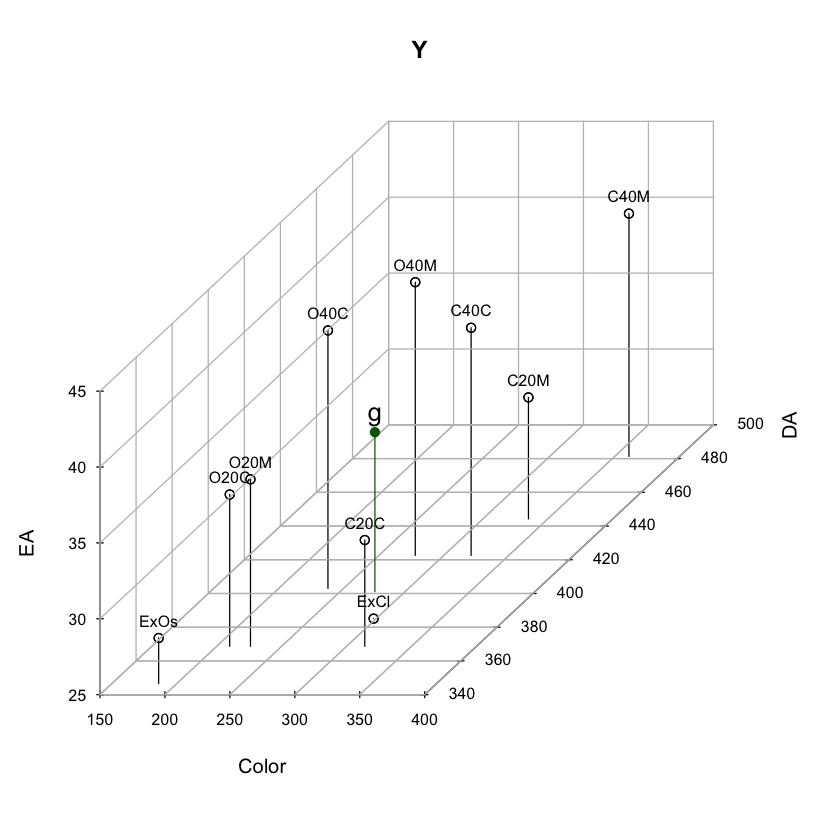

In [ ]:
par(las=1); # grafica;
Y3D<-scatterplot3d(Y,main="Y",type="h",color="black",box=FALSE,
				   las=1); 
Y3D$points3d(Y,pch=1);
addgrids3d(Y, grid = c("xy","xz","yz"));
cord2d<-Y3D$xyz.convert(Y) # convertir cordenadas 3D a 2D;
# poner etiquetas;
text(cord2d,labels=rownames(Y), cex=0.8,col="black",pos=3); 
# poner el centro de gravedad en la gráfica
g <- colMeans(Y) 
Y3D$points3d(t(g),pch=19,col="darkgreen",type = "h");
text(Y3D$xyz.convert(t(g)),labels="g",pos=3,col="black",
     cex=1.3);



#### **Centrado de la nube de puntos**
Los ejes se trasladan al centro de gravedad, restando a cada vector individuo el centro de gravedad:
$$
\mathbf{y_C}_i = \mathbf{y}_i - \mathbf{g}
$$

,Color,DA,EA
ExCl,21.3,-16.06,-10.5
C40M,84.3,80.14,5.5
C40C,44.3,21.44,4.5
C20M,58.3,43.14,-2.5
C20C,37.3,-32.46,-3.5
ExOs,-90.7,-54.56,-7.5
O40M,1.3,21.44,7.5
O40C,-38.7,1.84,6.5
O20M,-50.7,-32.46,0.5
O20C,-66.7,-32.46,-0.5


Color     DA     EA 
276.70 401.16  35.50

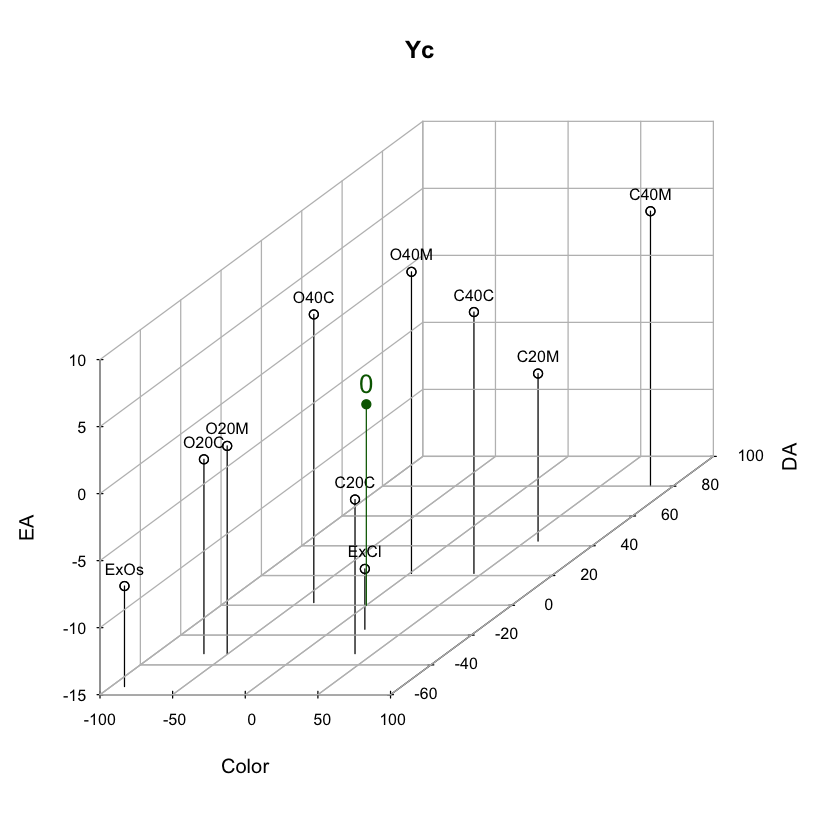

In [ ]:
# cálculo de la matriz de datos centrados y representación en 3D
Yc<-scale(Y,scale=FALSE)   #calculo
Yc
attr(Yc,"scaled:center")->g  #la función scale muestra el centro de gravedad
g
# grafica de datos centrados
par(las=1);
Yc3D<-scatterplot3d(Yc,main="Yc",type="h",color="black",
	               box=FALSE,las=1);
Yc3D$points3d(Yc,pch=1);
addgrids3d(Yc,grid=c("xy", "xz", "yz"));
text (Yc3D$xyz.convert(Yc),labels=rownames(Yc),cex=0.8,
	  col="black",pos=3);
Yc3D$points3d(t(c(0 ,0 ,0)),pch=19 , col ="darkgreen",type = "h");
text(Yc3D$xyz.convert (t(c(0 ,0 ,0))),labels ="0",pos =3, 
     col ="darkgreen",cex =1.3);


#### **Inercia de la nube de puntos**
$$
Inercia(N_n) = \sum\limits_{i=1}^{n}{p_i
d^2(i,\mathbf{g})}
$$
$$
  Inercia(N_n) =
 \sum\limits_{i=1}^{n} p_i\sum\limits_{j=1}^{p}y_{{_C}_{ij}}^2 =
  \sum\limits_{j=1}^{p}\sum\limits_{i=1}^{n} p_i y_{{_C}_{ij}}^2
 = \sum\limits_{j=1}^{p}\sigma_j^2 
$$

#### **Matriz de varianzas y covarianzas**
Si los pesos de los individuos son iguales: $p_i=\frac{1}{n}$
$$
  \mathbf{V}=\dfrac{1}{n} \mathbf{Y'_C}\mathbf{Y_C} $$ 
La inercia de la nube de puntos es también: $Inercia(N_n) = traza(\mathbf{V})$



In [ ]:
V<-covfacwt(Y) # función de ade4, divide por n
# la función var(Y) divide por n-1
round(V,0)


,Color,DA,EA
Color,3106,1738,61
DA,1738,1560,129
EA,61,129,33


#### **Cálculo y gráfica 3D de la matriz de datos estandarizados X**

,Color,DA,EA
ExCl,0.36,-0.39,-1.72
C40M,1.44,1.92,0.90
C40C,0.75,0.51,0.74
C20M,0.99,1.04,-0.41
C20C,0.63,-0.78,-0.57
ExOs,-1.54,-1.31,-1.23
O40M,0.02,0.51,1.23
O40C,-0.66,0.04,1.07
O20M,-0.86,-0.78,0.08
O20C,-1.14,-0.78,-0.08


Color     DA     EA 
276.70 401.16  35.50

Color    DA    EA 
 58.7  41.6   6.1

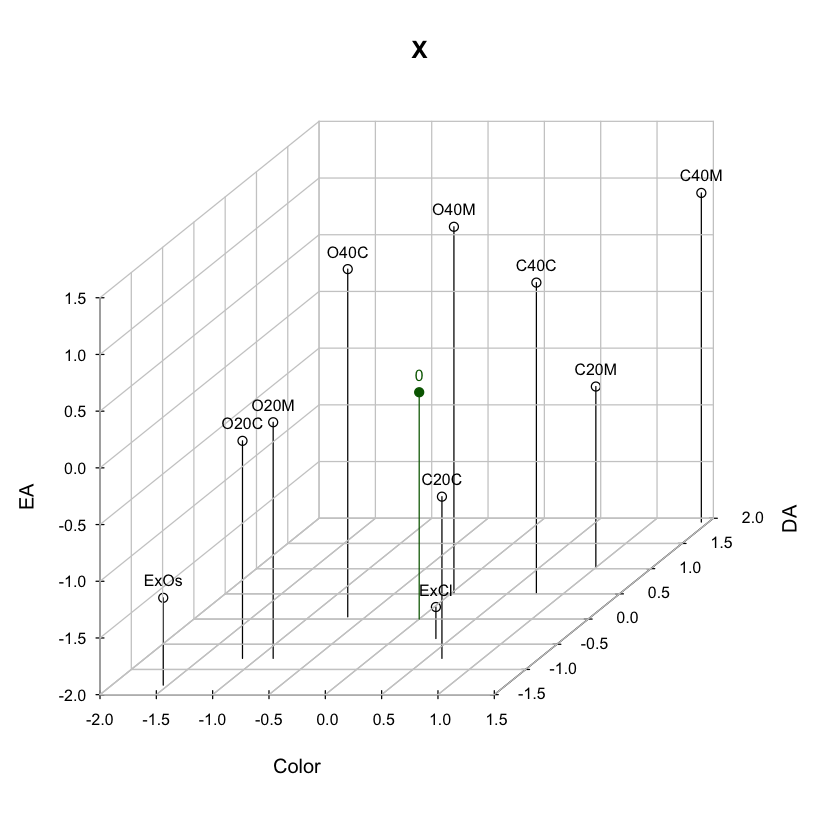

In [ ]:
# Cálculo de matriz X estandarizada
X<-scale(Y)
round(X,2)
# aquí la función scale calcula la media y la desviación estándar
# las varianzas que calcula R es la muestral: se divide por n-1
attr(X,"scaled:center")
round(attr(X,"scaled:scale"),1)
# gráfica de la matriz centrada y reducida (estandrizada)
par(las=1) # etiquetas de los dos ejes sean horizontales;
X3D<-scatterplot3d(X,main="X",type ="h",box=FALSE); 
X3D$points3d(Yc,pch=1);
addgrids3d(X,grid=c("xy","xz","yz"),col.grid="grey80");
text (X3D$xyz.convert(X),labels=rownames(X),cex=0.8,pos=3);
X3D$points3d (t(c(0,0,0)),pch=19,col="darkgreen",type="h");
text(X3D$xyz.convert(t(c(0,0,0))),labels="0",pos=3,col="darkgreen"
	 ,cex=0.8);


#### **Búsqueda del eje de mayor inercia proyectada (varianza)**

El valor de la proyección de un individuo *i* sobre el eje generado por un vector $\mathbf{u}$ unitario es: $<\mathbf{x}_i,\mathbf{u}>=\mathbf{x}_i'\mathbf{u}$.

El individuo $i$ suma a la inercia proyectada (varianza) sobre el eje $\mathbf{u}$ la cantidad $\dfrac{1}{n} (\mathbf{x}_i'\mathbf{u})^2$.

La inercia total de la nube de individuos (varianza), proyectada sobre el eje $\mathbf{u}$ es entonces:
$$
\sum_{i=1}^{n} \frac{1}{n} (\mathbf{x}_i'\mathbf{u})^2 =
\frac{1}{n}(\mathbf{Xu})'\mathbf{Xu} = \mathbf{u'}\frac{1}{n}\mathbf{X'Xu}
$$



<center>
<img src="https://github.com/cepardot/DiplomadoIAyAP20211/blob/main/uProyeccion.png?raw=TRUE" alt="Proyección sobre u" width="300" height="400">
<center>

Geométricamente la búsqueda del eje equivale a rotarlo hasta que la suma de cuadrados de las proyecciones de los puntos sobre él  sea máxima. Cuando los puntos tienen pesos iguales el eje coincide con la dirección donde la nube de puntos esté más alargada. Se puede observar que cualquier vector que esté sobre la recta es solución y por lo tanto se introduce la condición de que el vector sea unitario: $\mathbf{u'u}=1$, con lo cual las soluciones son dos, ya que si $\mathbf{u}$ es solución $-\mathbf{u}$ también lo es. Cómo es una optimización se pueden tener diferentes procedimientos para hacerlo. En Álgebra lineal se obtiene una solución analítica utilizando la técnica de multiplicadores de Lagrange.

<center>
<img src="https://images3.programmerclick.com/611/1d/1da21c4ce8bb7e0d68f27776d42a0c13.gif" alt="Linea proyeccion" width="400" height="500">
<center>

La solución es uno de los dos vectores propios unitarios asociados al valor propio más grande de la matriz:
$$
\dfrac{1}{n}\mathbf{X'X}
$$
que es la matriz de correlaciones. Una pareja (valor propio más grande, vector propio) se denota 
$(\lambda_1 ,\mathbf{u}_1)$

La matriz de correlaciones, cuando $n\geq p$, generalmente tiene $p$ valores propios, los cuales se ordenan de mayor a menor:
$$
\lambda_1 \geq \lambda_2 \geq \cdots \lambda_s \geq \cdots \lambda_S \geq \cdots \lambda_p
$$

Los
$p$ vectores propios
 $\{\mathbf{u_1},\cdots,\mathbf{u_s},\cdots,\mathbf{u_S} \cdots,\mathbf{u_p} \}$
generan un sistema de nuevos ejes, denominados componentes principales, que son variables, calculadas como combinaciones lineales (sumas ponderadas de las $p$ variables originales), se notan como $F_s, s=1,2 \cdots p$, que se pueden entender como nuevas variables y como vectores de dimensión $n \times 1$, cada uno con los valores de la nueva variable. Los  $p$ vectores $\mathbf{u}_s$ conforman una nueva base para soportar la nube de puntos.

<center>
<img src="https://miro.medium.com/max/972/1*foB2cfjPCgHVnSyon293pQ.gif" alt="eigenvectores" width="250" height="350">
<center>

Geométricamente lo que se ha hecho es una rotación rígida de los ejes. Veamos lo que sucede con el ejemplo café.

#### *Con la función eigen{base}*

In [ ]:
V<-cor(Y)
eigen(V)

eigen() decomposition
$values
[1] 2.0670307 0.8216466 0.1113227

$vectors
           [,1]        [,2]       [,3]
[1,] -0.5794934 -0.57140813  0.5811025
[2,] -0.6728898 -0.06680772 -0.7367197
[3,] -0.4597898  0.81794222  0.3457801


#### *Todos los resultados con la función dudi.pca{ade4} en el objeto acpcafe* 


In [ ]:
acpcafe<-dudi.pca(X,scannf=FALSE,nf=3)
acpcafe #contenido del objeto café

Duality diagramm
class: pca dudi
$call: dudi.pca(df = X, scannf = FALSE, nf = 3)

$nf: 3 axis-components saved
$rank: 3
eigen values: 2.067 0.8216 0.1113
  vector length mode    content       
1 $cw    3      numeric column weights
2 $lw    10     numeric row weights   
3 $eig   3      numeric eigen values  

  data.frame nrow ncol content             
1 $tab       10   3    modified array      
2 $li        10   3    row coordinates     
3 $l1        10   3    row normed scores   
4 $co        3    3    column coordinates  
5 $c1        3    3    column normed scores
other elements: cent norm 

#### *Valores propios*

In [ ]:
round(acpcafe$eig,3)

[1] 2.067 0.822 0.111

*Vectores propios*

In [ ]:
round(acpcafe$c1,3)

,CS1,CS2,CS3
,<dbl>,<dbl>,<dbl>
Color,0.579,-0.571,0.581
DA,0.673,-0.067,-0.737
EA,0.460,0.818,0.346


Note que el primer vector propio (columna CS1) tiene todas las coordenadas positivas y el primer vector propio obtenido con la función *eigen* de R tiene las tres coordenadas negativas ¿A qué se debe esto?

___________________________________________________________________________________________________________________

*Coordenadas de los individuos sobre los nuevos ejes*

In [ ]:
F<-acpcafe$li
round(F,2)

,Axis1,Axis2,Axis3
,<dbl>,<dbl>,<dbl>
ExCl,-0.89,-1.68,-0.11
C40M,2.68,-0.22,-0.29
C40C,1.18,0.15,0.33
C20M,1.14,-1.02,-0.35
C20C,-0.44,-0.82,0.79
ExOs,-2.47,-0.04,-0.38
O40M,0.98,1.01,0.06
O40C,0.15,1.31,-0.05
O20M,-1.04,0.65,0.11


*Grafica 3D de los cafés*

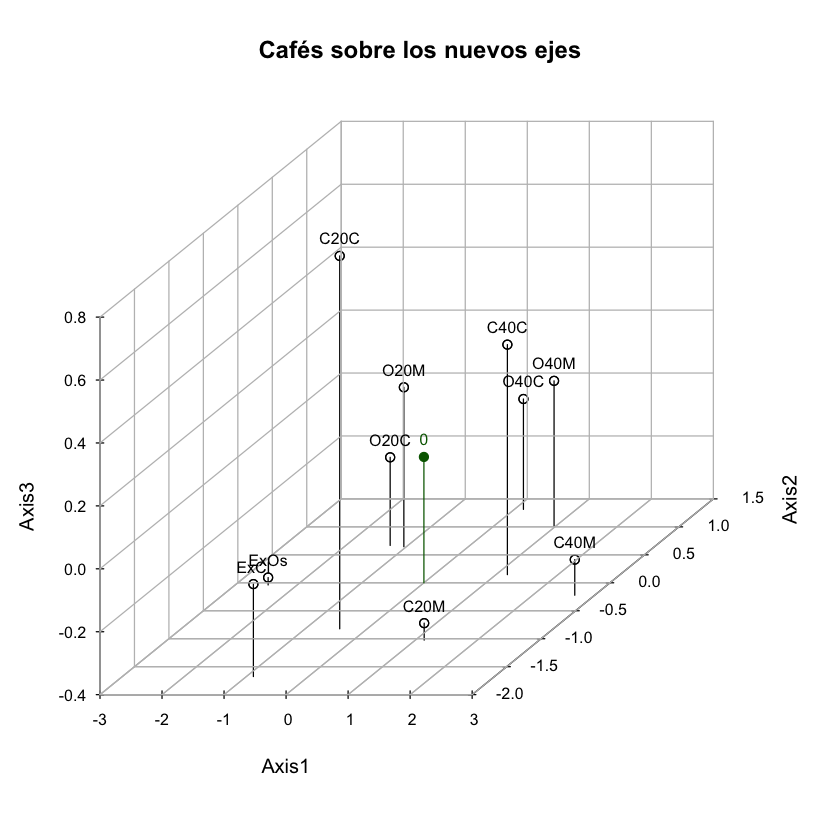

In [ ]:
# gráfica de la matriz centrada y reducida (estandrizada)
par(las=1) # etiquetas de los dos ejes sean horizontales;
X3D<-scatterplot3d(F,main="Cafés sobre los nuevos ejes",type ="h",box=FALSE); 
X3D$points3d(F,pch=1);
addgrids3d(F,grid=c("xy","xz","yz"));
text(X3D$xyz.convert(F),labels=rownames(F),cex=0.8,pos=3);
X3D$points3d (t(c(0,0,0)),pch=19,col="darkgreen",type="h");
text(X3D$xyz.convert(t(c(0,0,0))),labels="0",pos=3,col="darkgreen"
	 ,cex=0.8);


#### Proyección de los cafés sobre el primer plano factorial

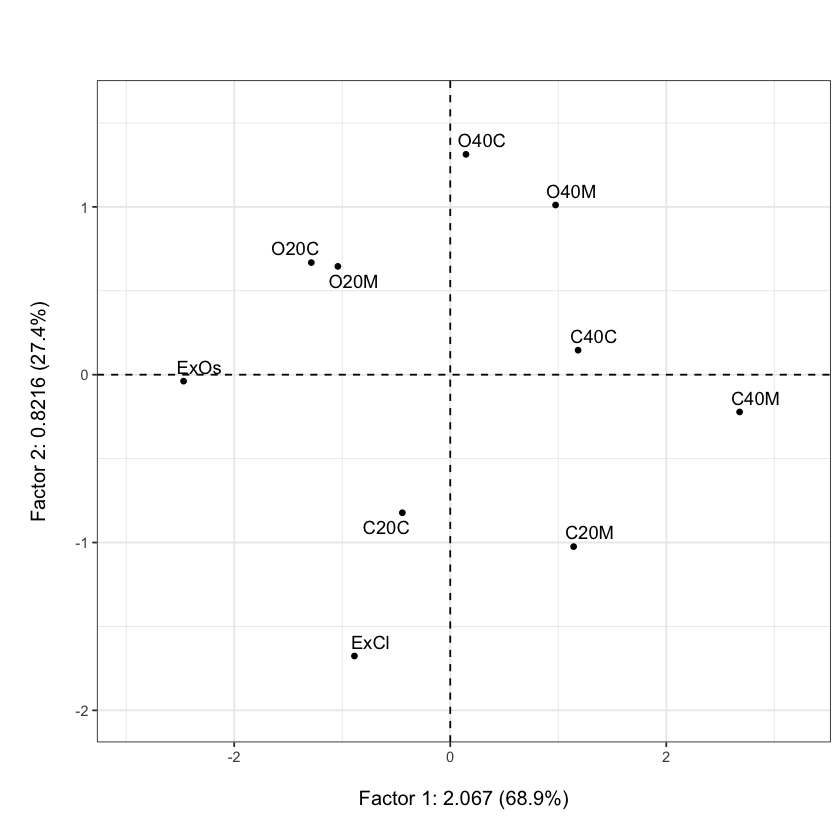

In [ ]:

plot(acpcafe,Tcol=FALSE,gg=TRUE)  # plot.dudi{FactoClass}
## con gg=TRUE, la función usa ggplot2 y ggrepel 
## para que las etiquetas no queden superpuestas


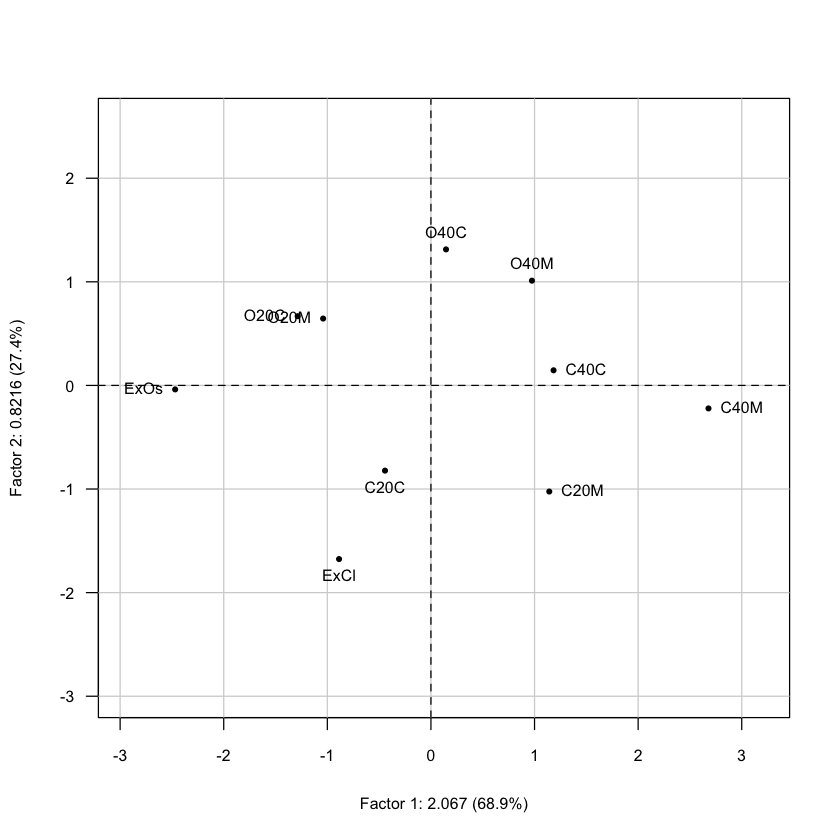

In [ ]:
# para que los ejes queden con la misma escala
plot(acpcafe,Tcol=FALSE,asp=1)

Histograma de valores propios

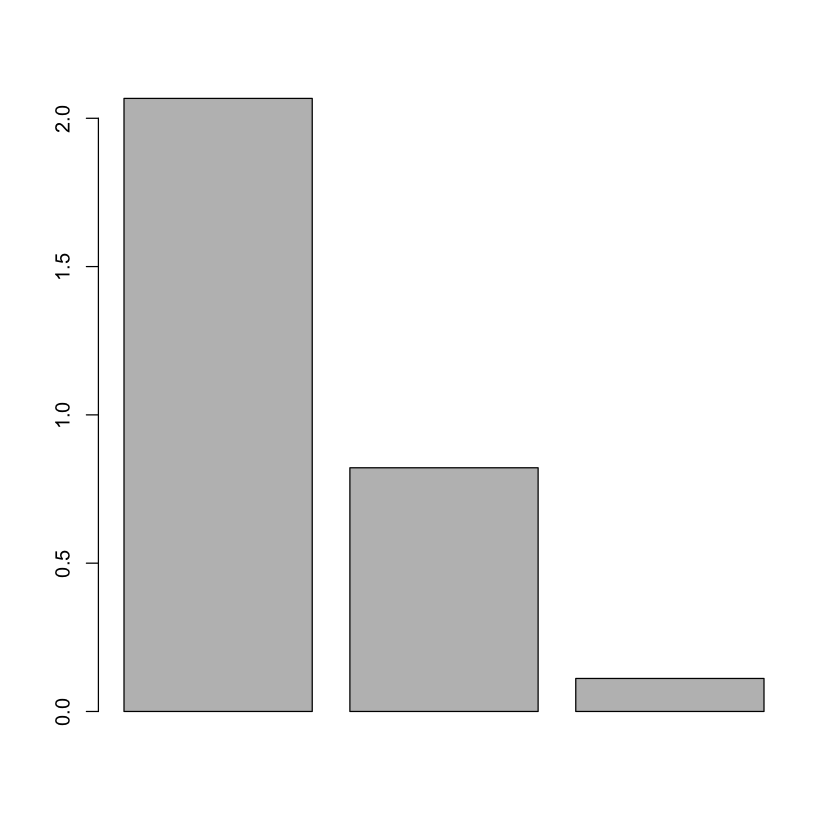

In [ ]:
barplot(acpcafe$eig)

### Nube de variables

La matriz de datos $\mathbf{Y}$ y sus transformaciones tienen una interpretación dual a la de los individuos: la nube de variables. Ahora los ejes son los individuos y las variables son los puntos. En el ejemplo café, se tienen entonces, tres puntos variable en $\mathbf{R}^{10}$.


In [ ]:
Y

,Color,DA,EA
,<int>,<dbl>,<int>
ExCl,298,385.1,25
C40M,361,481.3,41
C40C,321,422.6,40
C20M,335,444.3,33
C20C,314,368.7,32
ExOs,186,346.6,28
O40M,278,422.6,43
O40C,238,403.0,42
O20M,226,368.7,36


En el espacio de las variables los pesos están en la diagonal de $\mathbf{I}_p$, es decir son uno para todas las variables, y la métrica (matriz que define el producto interno) es la matriz diagonal con los pesos de los individuos, es decir $\frac{1}{n}\mathbf{I}_n$, para el caso de pesos iguales. Con esta métrica las estadísticas de resumen y las transformaciones de la matriz desde $\mathbf{Y}$ hasta la $\mathbf{X}$ tienen significado geométrico, lo que resumo a continuación (ver el capítulo 3 del [libro Estadística descriptiva multivariada](https://bit.ly/3mD9rEY)). 

- Media de una variable $j$: 
$$
\bar{Y}_j = \frac{1}{n} \sum_{i=1}^{n} y_{ij} = 
\frac{1}{n}\mathbf{Y'}_j \mathbf{1_{_n}} =
\left<  \mathbf{Y}_j,\mathbf{1_{_n}} \right>_{\frac{1}{n}\mathbf{I}_n} 
$$

- Centrado de una variable
$$
\mathbf{Y}_{C_j}=\mathbf{Y}_j - \overline{Y} \mathbf{1}_n 
$$
donde $\mathbf{1}_n$ es un vetor de $n$ unos ($n \times 1$).

<center>
<img src="https://github.com/cepardot/DiplomadoIAyAP20211/blob/main/EDMvariables.png?raw=TRUE" alt="Significado de la media y el centrado de una variable" width="400" height="500">
<center>

- Varianza

$$
var(Y_j) = \frac{1}{n} \sum_{i=1}^n (y_{ij} - \bar{Y}_j)^2 = 
\left<\mathbf{Y_{C}}_j,\mathbf{Y_{C}}_j\right>_{\frac{1}{n}\mathbf{I}_n}
$$

- Covarianza

$$
 cov(Y_j,Y_{k}) = \frac{1}{n} \sum_{i=1}^n (y_{ij} - \bar{Y}_j)(y_{ik} - \bar{Y}_{k}) = 
\left<\mathbf{Y_{C}}_j,\mathbf{Y_{C}}_{k}\right>_{\frac{1}{n}\mathbf{I}_n}
$$

- Significado del reducido

$$
\mathbf{X_j}=
\dfrac{1}{\sigma_j}\mathbf{Y}_{C_j}
$$

    + Varianza de una variable centrada y reducida:
    
$$
<\mathbf{X_j,X_j}>_{\frac{1}{n}\mathbf{I_n}}=\mathbf{X_j^{'}}\left(\frac{1}{n}\mathbf{I}_n\right)\mathbf{X}_j=
\frac{1}{n}\mathbf{X_j^{'}X_j}=1
$$ 
    Las variables estandarizadas se pueden ver como flechas que terminan en el cascarón hiperesféricon de radio 1 y centro origen.
    
 - Correlación

$$
cor(Y_j,Y_{k}) = \frac{cov(Y_j,Y_{k})}{\sigma_j \sigma_{k}}=
\frac{ <\mathbf{Y_{C_j},Y_{C_k}}>_{\frac{1}{n}\mathbf{I_n}}}{\| \mathbf{Y_{C_j}} \|_{\frac{1}{n}\mathbf{I_n}} \|\mathbf{Y_{C_k}} \|_{\frac{1}{n}\mathbf{I_n}}}=
<\mathbf{X_j,X_{k}}>_{\frac{1}{n}\mathbf{I_n}}
$$

    + El espacio de las variables de un ACP normado es una representación de la matriz de correlaciones.
    
    + Si entre dos vectores variables hay un ángulo pequeño, su correlación es alta; mientras dos vectores variables ortogonales indican que las variables no están correlacionadas.



**Búsqueda de los nuevos ejes**

El procedimento para encontrar los nuevos ejes es el mismo que en el de los individuos.

<center>
<img src="https://github.com/cepardot/DiplomadoIAyAP20211/blob/main/EDMvariablesprimerEjeColor.png?raw=TRUE" alt="Búsqueda de los nuevos ejes en el espacio de las variables" width="300" height="400">
<center>

Solución con vectores propios $\frac{1}{n}\mathbf{I}_n$ unitarios asociados a los $\mu$ valores propios de la matriz:
$$
\frac{1}{n}\mathbf{XX'}
$$

- Esta matriz es $n \times n$, pero solo tiene $p$ valores propios mayores que 0 (se supone que $n \geq p$)

- Los dos espacios están relacionados.

### Relaciones entre los espacios de individuos y de variables

- La matriz  $$\frac{1}{n}\mathbf{XX'}$$ tiene $p$ valores propios, que son iguales a los valores propios de $$\frac{1}{n}\mathbf{X'X}$$ y los restantes $n - p$ valores propios son 0. 

- El vector coordenadas de los $n$ individuos sobre el eje $s$  $\mathbf{F}_s$, es un vector propio de $$\frac{1}{n}\mathbf{XX'}$$.

- La varianza de $\mathbf{F}_s$ es $\lambda_s$, y por lo tanto, el vector propio $\mathbf{v}_s$ se puede calcular mediante:  $$\mathbf{v}_s=\frac{1}{\sqrt{\lambda_s}}\mathbf{F}_s$$.

-  $\mathbf{G}_s$, vector de coordenadas de las $p$ variables sobre el eje $s$, es un vector propio de $$\frac{1}{n}\mathbf{X'X}$$.

- La varianza de $\mathbf{G}_s$ es $\lambda_s$, y por lo tanto, se puede obtener mediante:   $$\mathbf{G}_s =\sqrt{\lambda_s}\mathbf{u}_s$$.

- En el ACP normado, las coordenadas de $\mathbf{G}_s$ son las correlaciones entre las variables y el eje $s$: $cor(Y_j,F_s)$.


## **Círculo de correlaciones del ejemplo café**

,Color,DA,EA
Color,1.00,0.79,0.19
DA,0.79,1.00,0.57
EA,0.19,0.57,1.00


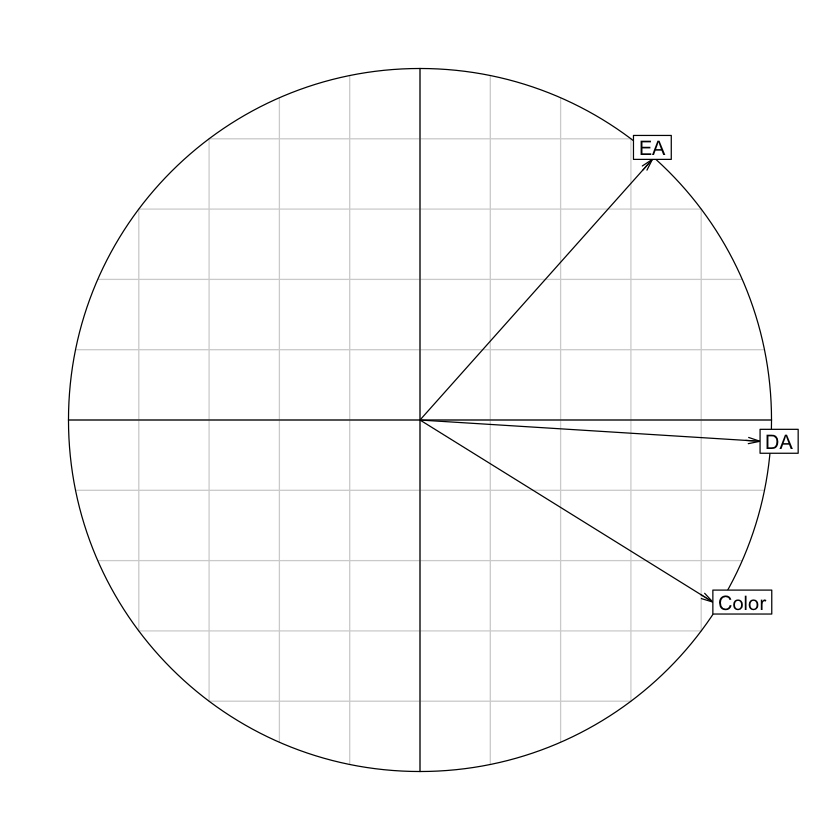

In [ ]:
s.corcircle(acpcafe$co)
# matriz de correlaciones
round(cor(Y),2)


# Ayudas para la interpretación
Es importante evitar malas lecturas de los ejes y planos factoriales. En las ayudas para la interpretación se encuentran índices para evitarlo. Otras ayudas orientan la lectura de las gráficas y la toma de decisiones metodológicas. A continuación se presentan las del ejemplo café y se recomienda leer sobre ellas en el capítulo 3 del libro EDM


In [ ]:
ayuacpcafe<-inertia(acpcafe,T,T) # inertia.dudi es una función de ade4


#### Valores propios


,inertia,cum,cum(%)
,<dbl>,<dbl>,<dbl>
Ax1,2.0670307,2.067031,68.90102
Ax2,0.8216466,2.888677,96.28924
Ax3,0.1113227,3.000000,100.00000


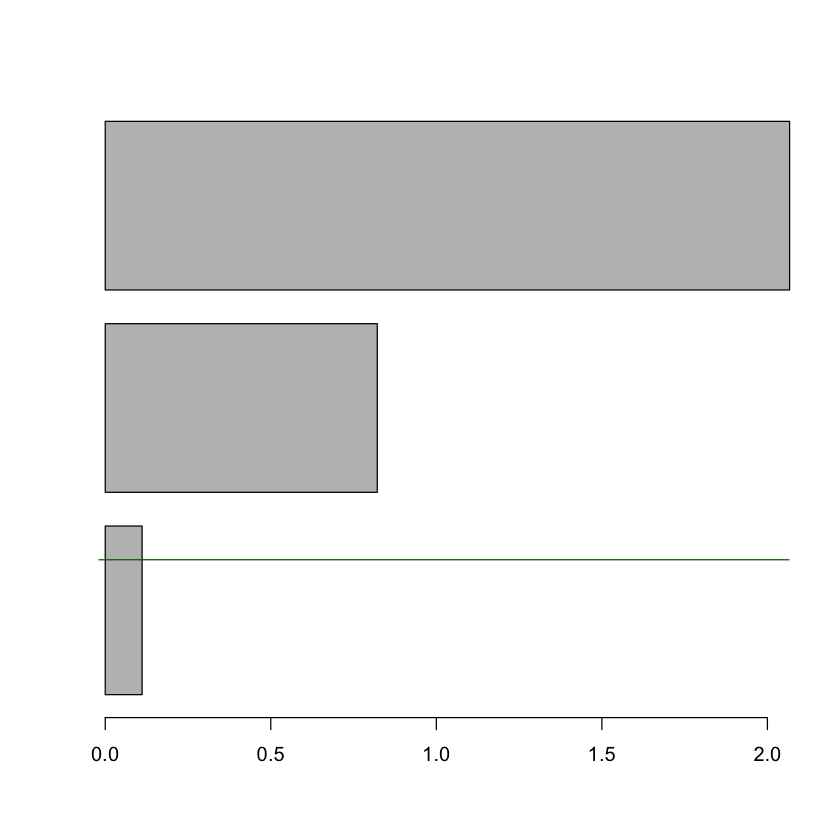

In [ ]:
ayuacpcafe$tot.inertia
barplot(ayuacpcafe$tot.inertia$inertia[3:1],hor=TRUE)
abline(h=1,col="darkgreen")

#### Coordenadas y ayudas para las variables

In [ ]:
names(ayuacpcafe)

[1] "tot.inertia" "row.contrib" "row.abs"     "row.rel"     "row.cum"    
 [6] "col.contrib" "col.abs"     "col.rel"     "col.cum"     "nf"         
[11] "call"

In [ ]:
attach(ayuacpcafe)
round(cbind(acpcafe$co,Ca=col.abs,Cos2=col.rel,conInercia=col.contrib),2)
detach(ayuacpcafe)

,Comp1,Comp2,Comp3,Ca.Axis1,Ca.Axis2,Ca.Axis3,Cos2.Axis1,Cos2.Axis2,Cos2.Axis3,conInercia
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Color,0.83,-0.52,0.19,33.58,32.65,33.77,69.41,-26.83,3.76,33.33
DA,0.97,-0.06,-0.25,45.28,0.45,54.28,93.59,-0.37,-6.04,33.33
EA,0.66,0.74,0.12,21.14,66.90,11.96,43.70,54.97,1.33,33.33


#### Coordenadas y ayudas para los cafés

In [ ]:
attach(ayuacpcafe)
round(cbind(acpcafe$li,Ca=row.abs,Cos2=row.rel,conInercia=row.contrib),2)
detach(ayuacpcafe)

,Axis1,Axis2,Axis3,Ca.Axis1,Ca.Axis2,Ca.Axis3,Cos2.Axis1,Cos2.Axis2,Cos2.Axis3,conInercia
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ExCl,-0.89,-1.68,-0.11,3.80,34.19,1.01,-21.80,-77.89,-0.31,12.02
C40M,2.68,-0.22,-0.29,34.72,0.60,7.39,98.20,-0.67,-1.13,24.36
C40C,1.18,0.15,0.33,6.78,0.26,9.85,91.45,1.39,7.16,5.11
C20M,1.14,-1.02,-0.35,6.31,12.77,10.77,52.75,-42.41,-4.84,8.25
C20C,-0.44,-0.82,0.79,0.95,8.23,55.37,-13.20,-45.42,41.38,4.97
ExOs,-2.47,-0.04,-0.38,29.49,0.02,12.73,-97.70,-0.02,-2.27,20.79
O40M,0.98,1.01,0.06,4.60,12.44,0.35,48.09,51.72,0.19,6.59
O40C,0.15,1.31,-0.05,0.10,20.98,0.22,1.21,98.65,-0.14,5.82
O20M,-1.04,0.65,0.11,5.24,5.07,1.02,-71.67,27.58,0.75,5.03


# Proyección de elementos suplementarios o ilustrativos

Sobre los planos factoriales de las variables se pueden proyectar variables continuas que no participaron en el análisis, lo que enriquece los análisis.

En los planos factoriales de los individuos se pueden proyectar: individuos suplementarios, variables cualitativas, y los antiguos ejes unitarios para las variables activas que estén bien representadas.

Ver capítulos 3 y 4 del libro EDM.


# ACP generalizado


La generalización del ACP es que al permitir otras matrices de producto interno se puede establecer un marco común para los métodos en ejes principales, lo cual se puede consultar en el capítulo 4 del libro EDM. 